<h1 align="center">
    <img 
        src="./img/Microsoft-Logo.png" 
        width="400"/>
</h1>
<h1 align="center">
    <b>Practical Guide</b>
</h1>
<h4 align="center">
    for the creation of an AI Solution using an accelerator from the <a href="https://www.ds-toolkit.com/">Data Science Toolkit</a>
</h4>

# What to expect

* **Challenge 1:** *Automatically determine relevant features from the set of questions.*
* **Challenge 2:** *From the dataset, fill out the dataset of the new features defined.*
* **Challenge 3:** *Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs. Then apply SHAP to the newly created models.*

# Challenge 1: *Determine relevant features from the questions*

Here we will use the set of questions and leverage an LLM to determine what would be good features to try and understand the resulting metrics.

## Challenge 1 - Step 1:  Let's import the required packages and libraries.

>This is going to be done in a quiet mode, and only errors will be displayed if they occur. If you like to see what is going to be installed look at the [requirements.txt](./requirements.txt) file.

In summary two main tools will be installed that will be used in this notebook:

* **genAISHAP**. Is the library containing the tools for the DS Toolkit.
* **shap**. A popular library used to help with interpretability.

In [107]:
%%time
import pandas as pd
from genaishap import Featurizer, GenAIExplainer
import matplotlib.pyplot as plt
import shap
from IPython.display import Markdown, display, clear_output

import ipywidgets as widgets
from IPython.display import display

shap.initjs()

CPU times: total: 0 ns
Wall time: 0 ns


### Some definitions:

* **Context prescision:** Measures how much of the generated output is relevant and aligns with the context provided in the input.
* **Context recall:** Measures how much of the relevant information in the input context is included in the output.
* **Faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding "hallucinations" (made-up or false information).

Below, the dataset of questions, retrieved contexts, generated and expected responses and their corresponding metrics is presented. Remember that this dataset is generated following the same procedure explained in the previous notebook.

In [3]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_test_dataset.head(10)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0
5,How many EV charging locations were there on G...,[This guidance does not recognize existing ren...,The provided context does not specify the numb...,200000,1.000000,0.0,0.0
6,On what page of the report can I find the perf...,"[Employee Recruitment, Inclusion and Performan...",The performance highlights for the Empowering ...,The performance highlights for Empowering User...,0.000000,0.0,0.0
7,Can you please provide for me the glossary of ...,[GRI INDEX\nGRI 304 - Biodiversity\nGRI 103 Ma...,I'm unable to provide the glossary of the docu...,"Sure, here is the glossary:\nGlossary\nCFE: ca...",0.500000,0.0,0.0
8,On what page can I find details about Amazons ...,[IntroductionSustainability\nDriving Climate S...,You can find details about Amazon's climate so...,You can find information on driving climate so...,0.000000,0.0,0.0
9,"For the listed Renewable Energy goals, by when...",[IntroductionSustainability\nDriving Climate S...,Amazon intends to have all operations powered ...,Amazon set the goal of becoming powered by 100...,1.000000,1.0,0.0


In [4]:
df_test_dataset.iloc[1,0]

"What percentage of waste from Google's offices globally were diverted away from landfills in 2021?"

## Challenge 1 - Step 2: Let's extract features from the questions in the dataset

* To do this, we will use the function `Featurizer` from the **genAISHAP** library.
* The features created are then displayed. Remember that these features are generated automatically.

> **TO DO:** Explain briefly how the `Featurizer` works.

In [5]:
%%time

# The Featurizer is part of the DS Toolkit and is able to take the list of provided questions and create a dataset of features for them automatically.
featurizer = Featurizer.from_pandas(df_test_dataset)
featurizer.create_features_using_azure_openai(
    deployment_name="gpt-4o", # Update with the name of your Azure OpenAI LLM deployment name
    num_features=25
)
print(featurizer.features.model_dump_json(indent=4))

{
    "features": [
        {
            "feature": "there_is_any_company_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_companies_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_initiative_or_program_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_initiatives_or_programs_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_financial_or_environmental_metric_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_financial_or_environmental_metrics_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_specific_year_identified_in_the_question",
            "ftype": "boolean"
        }

# Challenge 2: From the dataset, fill out the dataset of the new features defined.

In [6]:
%%time

featurizer.fill_out_features_using_azure_openai(
    deployment_name="gpt-4o", 
    batch_size=20
)

  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: total: 562 ms
Wall time: 3min 39s


C:\Users\vscode-user\src\repos\tc-2025\.conda\lib\site-packages\genaishap\featurize.py:252: UserWarning: There are differences in some question input and output review the version of the language model, try to use a bigger model >=gpt-4o.  The differences are: 
QIN: What was the listed key achievement regarding sustainbility and climate change for Google in 2077?
QOU: What was the listed key achievement regarding sustainability and climate change for Google in 2077?

QIN: What were Amazon's Carbon Intesity values in (C02e per $ of GMS) in the years 2019 to 2022?
QOU: What were Amazon's Carbon Intensity values in (C02e per $ of GMS) in the years 2019 to 2022?

  warnings.warn(message)


In [7]:
df_features = featurizer.to_pandas()
df_test_dataset.join(df_features)
df_test_dataset.head()

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0


# Challenge 3: 
## Challenge 3 - Step 1: Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs.

> **TO DO:** Explain what happens in the toolkit including:
> * Creation of multiple regression models for each metric. For these models, the input variables are the automatically generated features from the previous steps and the output variable is the variable in question. Multiple models are created and the best performing one is selected.
> * In order to do that, some variables are converted, e.g., using one hand encoding. This means the the models will be working with more variables than the original defined number.

In [8]:
genai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)
genai_explainer.feature_engineering()
genai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\vscode-user\src\repos\tc-2025\.conda\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 4 estimated values in the metric faithfulness far from the original values. The following is the list of indexes [24, 25, 26, 27].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\vscode-user\src\repos\tc-2025\.conda\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 4 estimated values in the metric context_precision far from the original values. The following is the list of indexes [24, 25, 26, 27].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\vscode-user\src\repos\tc-2025\.conda\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 4 estimated values in the metric context_recall far from the original values. The following is the list of indexes [24, 25, 26, 27].
  warnings.warn(


### Show the `r2 score` of the selected models

In [9]:
genai_explainer.r2_scores_

{'faithfulness': 0.8385636723631945,
 'context_precision': 0.9309597238520217,
 'context_recall': 0.9242273351556837}

### Let's select one of our metrics
1. Select on of the metrics from the dropdown menu below.
2. Check how well the regression model created with the automated features follows the selected metric. This should give us an idea about how reliable our explanations are.

Dropdown(description='Select:', index=2, options=('faithfulness', 'context_precision', 'context_recall'), valu…


### **context_recall:** Measures how much of the relevant information in the input context is included in the output.


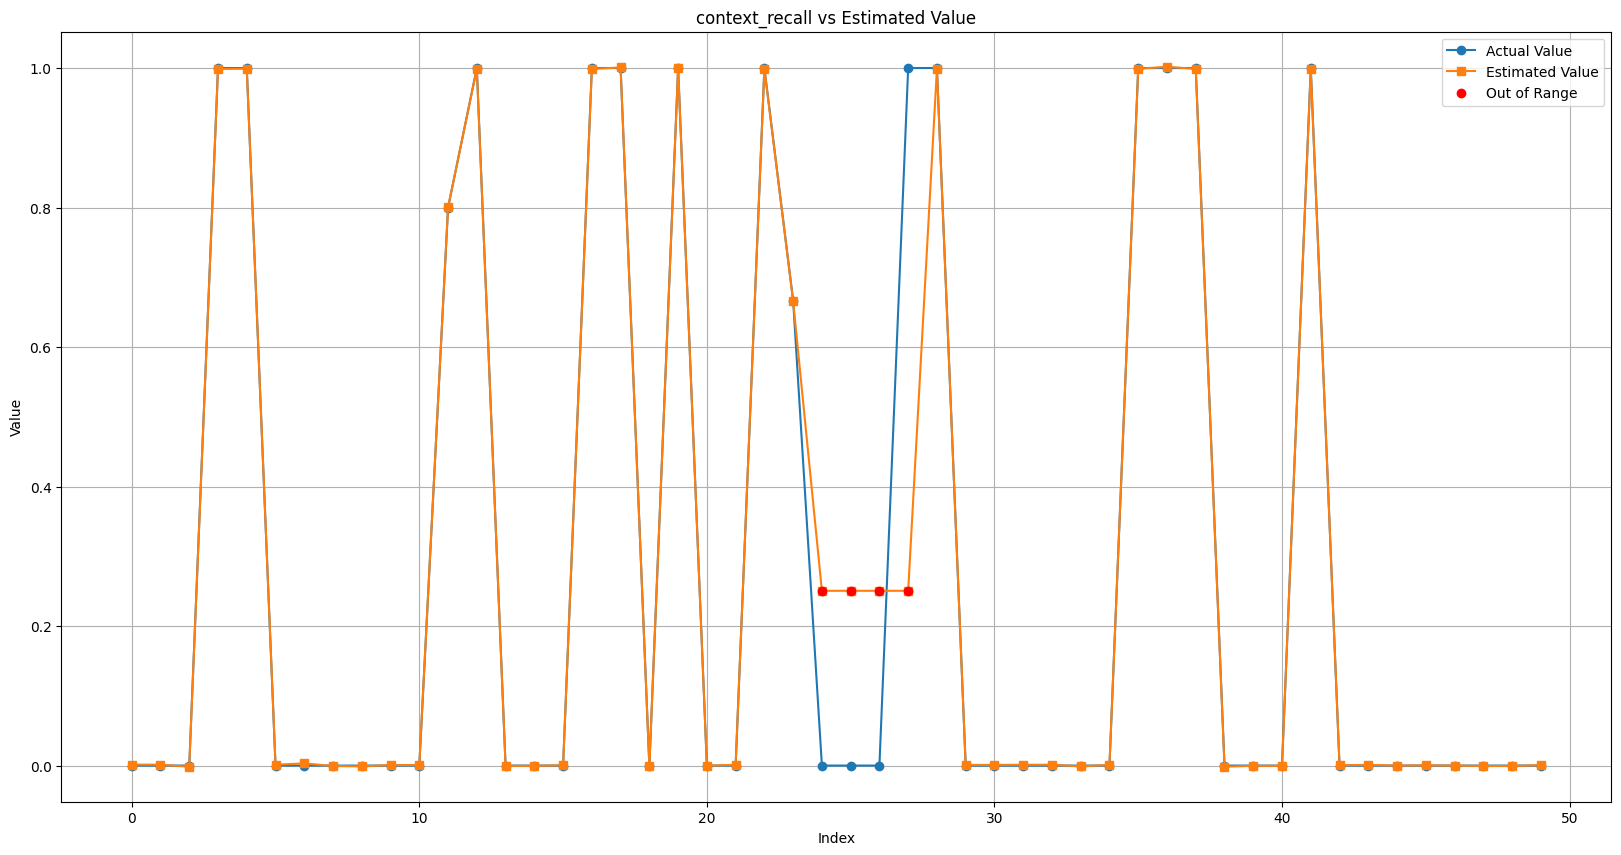

In [104]:
dropdown_values = ["faithfulness", "context_precision", "context_recall"]

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=dropdown_values,
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_metric
    sel_metric = change['new']
    # print(f'Selected metric: {sel_metric}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    if sel_metric == "faithfulness":
        metric_text = "Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)"
    elif sel_metric == "context_precision":
        metric_text = "Measures how much of the generated output is relevant and aligns with the context provided in the input."
    elif sel_metric == "context_recall":
        metric_text = "Measures how much of the relevant information in the input context is included in the output."
    
    metric_details = f"""
### **{sel_metric}:** {metric_text}
"""
    # Display a reminder of the metric's definition
    display(Markdown(metric_details))

    # Plot the actual vs estimated values for the selected metric
    metric = sel_metric
    X = pd.DataFrame(genai_explainer.preprocessed_features)

    df_metric = pd.DataFrame(genai_explainer.metrics)[[metric]]
    df_metric['estimated_value'] = genai_explainer.estimators_[metric].predict(X)
    df_metric['is_out_of_range'] = genai_explainer.is_out_of_range_[metric]



    plt.figure(figsize=(20,10))
    plt.plot(df_metric[metric], label='Actual Value', marker='o')
    plt.plot(df_metric['estimated_value'], label='Estimated Value', marker='s')

    # Highlight the out-of-range values
    out_of_range_indices = df_metric[df_metric['is_out_of_range']].index
    plt.scatter(out_of_range_indices, df_metric.loc[out_of_range_indices, 'estimated_value'], color='red', label='Out of Range', zorder=5)

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{metric} vs Estimated Value')
    plt.legend()
    plt.grid(True)
    plt.show()
# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')



display(dropdown)

## Challenge 3 - Step 2: Present the explainability results from SHAP
### For the selected metric show the SHAP values of each feature.

> **TO DO:** Provide a syntethized explanation of SHAP and the plot below

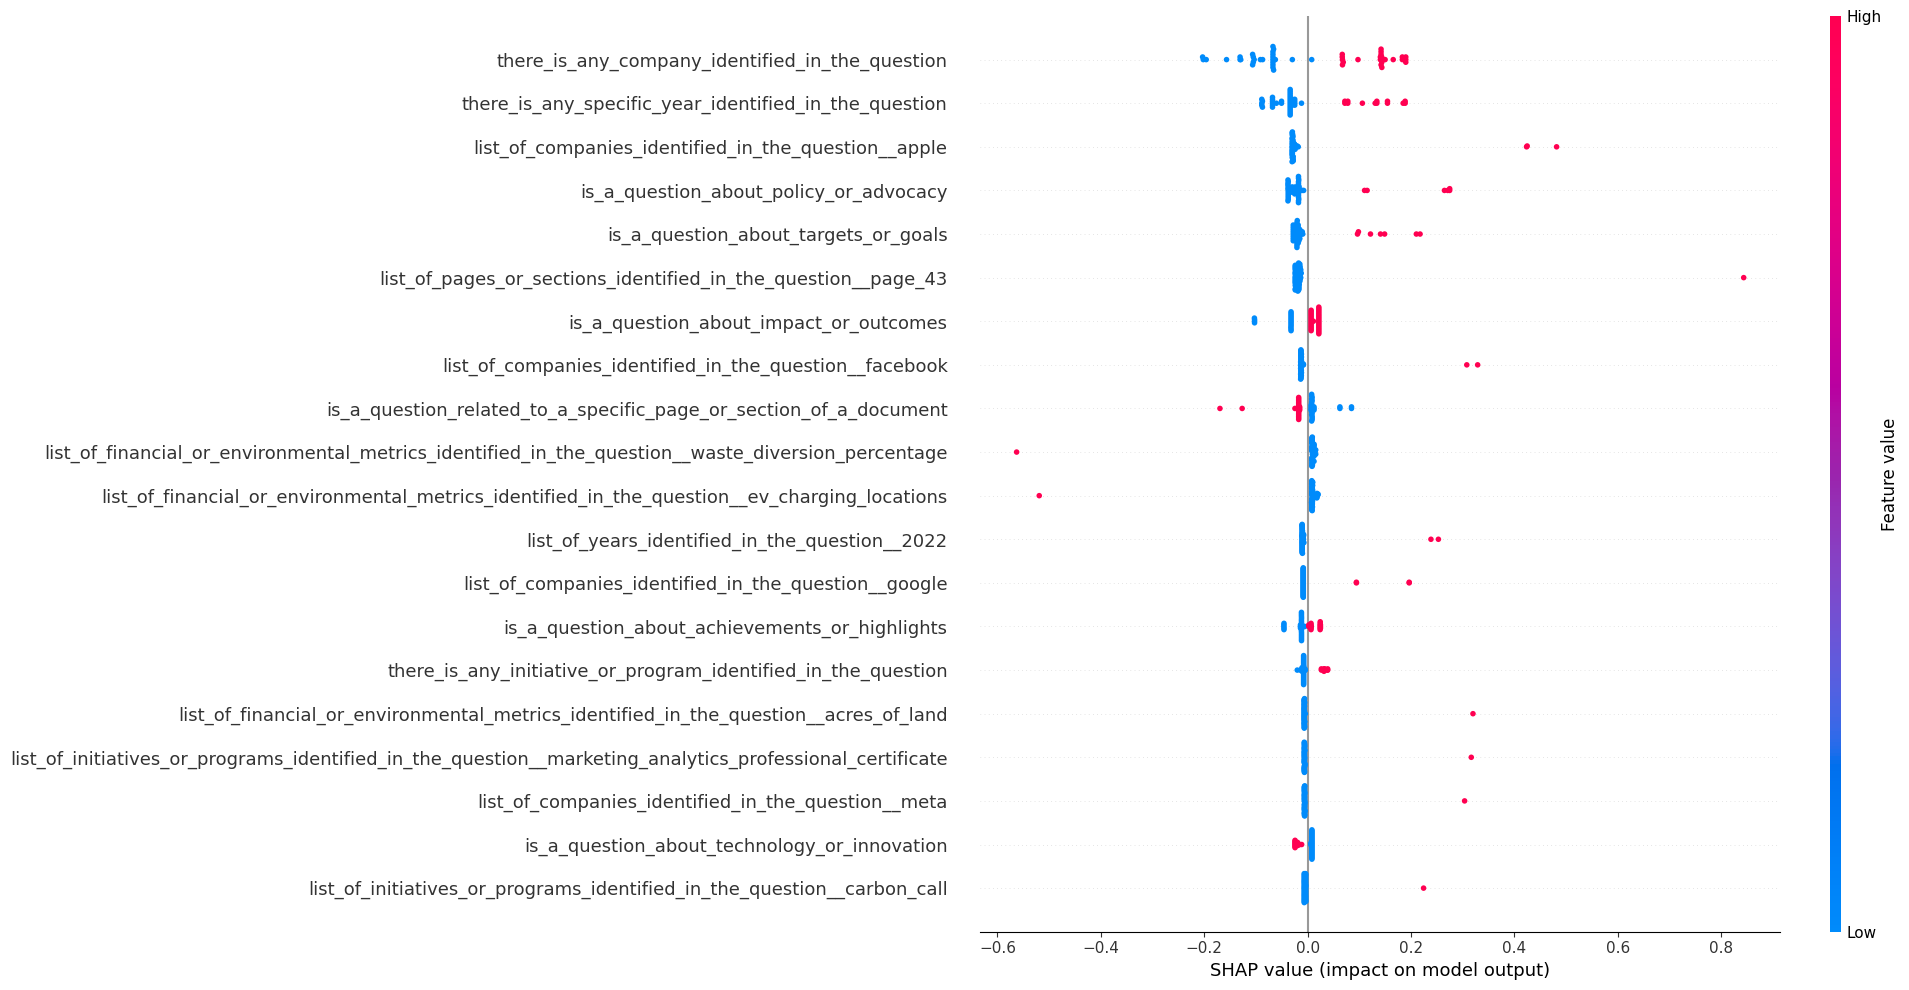

In [105]:
metric_explainer = genai_explainer.explainers_[metric]
shap_values = metric_explainer(X)
shap.summary_plot(shap_values, X, plot_size=(20,10))

### Now let's select one question
1. For the selected question, display the question, the retrieved contexts, the generated and expected answers, the metric value and the predicted metric from the model trained
2. Also, show the SHAP values for the selected question (for the previously selected metric).

> **TO DO:** provide a syntethized explanation of the plot below

Dropdown(description='Select:', index=28, options=(('Can you provide for me the three highlights for the GHG e…


### INDEX 28

**USER INPUT:**
How many more acres of land does Microsoft need to protect by 2025 according to Ecosystems Chart 1?

**RETRIEVED CONTEXT:**


**CHUNK 1:**

• • 
a 
47
 | | | 
Commitments and progress 
0 
4,000 
2,000 
8,000 
6,000 
12,000 
14,000 
10,000 
16,000 
Acres of land 
11,000 
Microsoft land use footprint 
acres 
17,268
of total land contracted to protect in FY22 
acres 
12,270 
of total land 
protected 
acres 
18,000 
Our commitment 
Taking responsibility for our 
land footprint 
We will take responsibility for the ecosystem impacts 
of our direct operations by protecting more land 
than we use by 2025. 
Our progress 
Protecting acres of land 
In FY22, we protected 12,270 acres of land in 
Belize. Another 4,998 acres in the United States are 
contracted for protection in future years. We now 
have funded more land to be protected than the 
11,000 acres of land that we use. 
We protected 12,270 acres of land in 2022, 
exceeding our land use footprint. 
Ecosystems Chart 1 
Achieving our target of protecting more land than we use by 2025 
As of FY22, Microsoft has contracted to protect 17,268 acres of land, which is over 50 percent more than 
the land we use to operate, and 12,270 acres were designated as permanently protected. 
Learn more in the Environmental Data Fact Sheet

**CHUNK 2:**

46
 | | | 
Protecting more 
land than we use 
Ecosystems 
Taking responsibility for 
our land footprint 48 
Key trends and what's next 50 
Our approach 
Microsoft directly operates on approximately 11,000 
acres of land around the world, and we recognize that 
our own land footprint has an impact on ecosystems. 
We have made a commitment to permanently 
protect more land than we use by 2025. We are also 
committed to being good stewards of the land we 
use – as well as going beyond our own operations 
and actively working to protect the environmental 
health of the communities that host our datacenter 
operations and where our employees live and work. 
We have contracted to protect 17,268 
acres of land, which is over 50 percent 
more than the land we use to operate. 
12,270 
In FY22, 12,270 
acres were legally 
designated as 
permanently 
protected in Belize. 
Another 4,998 acres 
have been funded 
for protection 
in future years. 
We work to be good stewards of the land we use and help 
protect the environmental health of our communities.

**RESPONSE:**
Microsoft does not need to protect any more acres of land by 2025 according to Ecosystems Chart 1, as they have already contracted to protect 17,268 acres, which is over 50 percent more than the 11,000 acres they use.

**REFERENCE:**
4998 more acres

**METRIC → context_recall :** Measures how much of the generated output is relevant and aligns with the context provided in the input.

**METRIC Value:** 1.000

**MODEL ESTIMATED Value:** 0.999


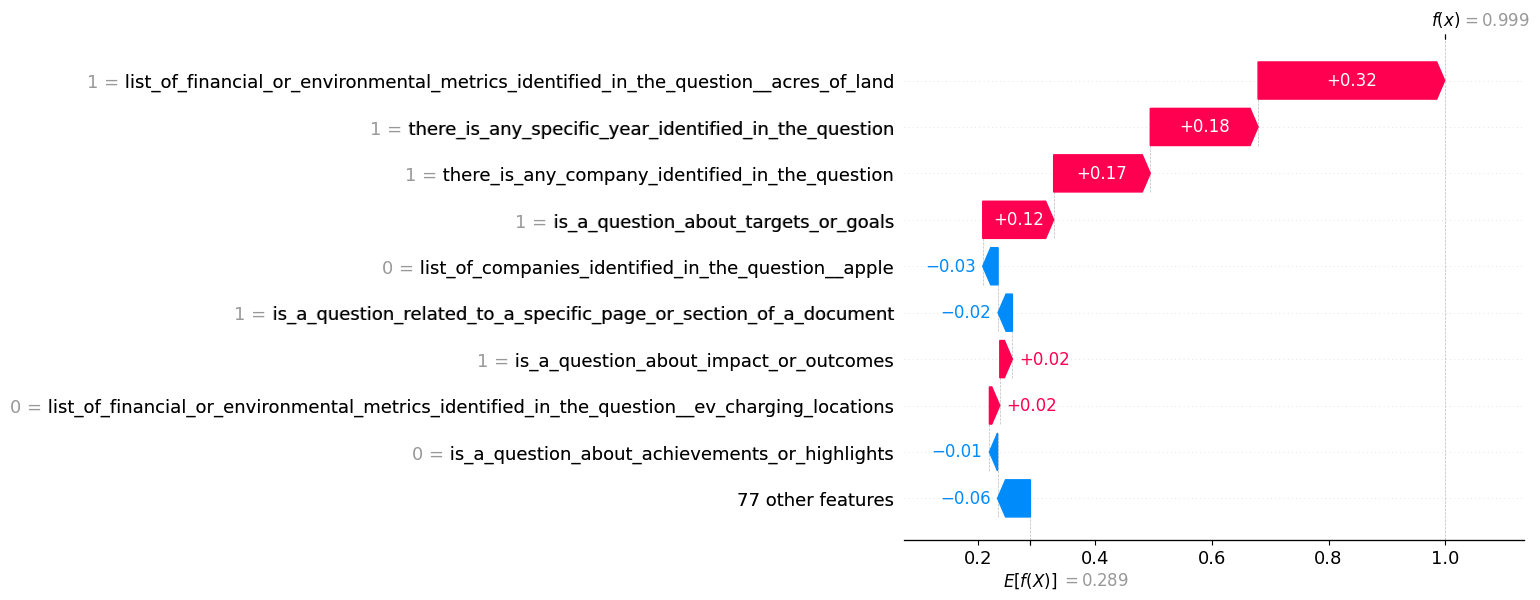

In [106]:
# Define the dropdown values
dropdown_values = df_test_dataset.iloc[:, 0].tolist()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=[(value, index) for index, value in enumerate(dropdown_values)],
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_question
    sel_question = change['new']
    # print(f'Selected question: {sel_question}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    # Display the details of the selected question
    index = sel_question

    context = df_test_dataset.loc[index,'retrieved_contexts']
    context_str = "\n".join([f"\n**CHUNK {i+1}:**\n\n{c}" for i, c in zip(range(len(context)),context)])

    index_details = f"""
### INDEX {index}

**USER INPUT:**
{df_test_dataset.loc[index,'user_input']}

**RETRIEVED CONTEXT:**

{context_str}

**RESPONSE:**
{df_test_dataset.loc[index,'response']}

**REFERENCE:**
{df_test_dataset.loc[index,'reference']}

**METRIC → {metric} :** {metric_text}

**METRIC Value:** {df_test_dataset.loc[index, metric]:.3f}

**MODEL ESTIMATED Value:** {df_metric.loc[index, 'estimated_value']:.3f}
"""

    display(Markdown(index_details))
    shap.waterfall_plot(shap_values[index])

# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')

# Display the dropdown widget
display(dropdown)